In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
link = 'https://drive.google.com/file/d/1IJq99rEqWh8zIuwmX3p6eIy7oCL_AjJN/view?usp=sharing'

In [18]:
fluff, id = link.split('=')
print (id) 

sharing


In [20]:

downloaded = drive.CreateFile({'https://drive.google.com/file/d/1IJq99rEqWh8zIuwmX3p6eIy7oCL_AjJN/view?usp=sharing':4/xQFJtxz8HTymjN6qF-GKC_F9uBBY7-TwGyK7Zt07KX1l72o0HeDv5qk}) 
downloaded.GetContentFile('AllMoviesDetailsCleaned.csv')  
df3 = pd.read_csv('AllMoviesDetailsCleaned.csv')

NameError: ignored

In [21]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authentica
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/file/d/1IJq99rEqWh8zIuwmX3p6eIy7oCL_AjJN/view'

In [35]:
fluff, id = link.split('https://drive.google.com/file/d/1IJq99rEqWh8zIuwmX3p6eIy7oCL_AjJN/view')
print (id)

In [37]:
downloaded = drive.CreateFile({'https://drive.google.com/file/d/1IJq99rEqWh8zIuwmX3p6eIy7oCL_AjJN/view':id}) 
downloaded.GetContentFile('AllMoviesDetailsCleaned.csv')  
df3 = pd.read_csv('AllMoviesDetailsCleaned.csv')

FileNotUploadedError: ignored

In [38]:
from google.colab import files
uploaded = files.upload()


Saving AllMoviesDetailsCleaned.csv to AllMoviesDetailsCleaned.csv


In [0]:
import io
import pandas as pd
df = pd.read_csv('AllMoviesDetailsCleaned.csv',  encoding='utf-8-sig', sep=";", 
                 engine="python",parse_dates=["release_date"])

In [43]:
df.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,1988-10-21,0,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,1986-10-16,0,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,1995-12-25,4300000,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,1993-10-15,12136938,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,2006-01-01,0,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


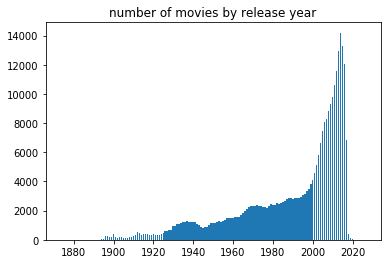

In [45]:
import matplotlib.pyplot as plt
serie = df["release_date"].map(lambda x:x.year)
nb_films_an = df["id"].groupby(pd.Index(serie)).count()

plt.bar(nb_films_an.index,nb_films_an)
plt.title("number of movies by release year")
plt.show()

In [46]:
print(df.columns)
df = df[["id","title","budget","genres","popularity","revenue","release_date"]] 
df = df.dropna(axis=0,how="any")
df = df[df.genres.str.contains("Crime|Action")]
print(df.shape)
df.head()

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number'],
      dtype='object')
(30496, 7)


,id,title,budget,genres,popularity,revenue,release_date
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21
2,5,Four Rooms,4000000,Crime|Comedy,1.698,4300000,1995-12-25
3,6,Judgment Night,0,Action|Thriller|Crime,1.32287,12136938,1993-10-15
6,11,Star Wars,11000000,Adventure|Action|Science Fiction,10.492614,775398007,1977-05-25
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40031879,2000-05-17


In [47]:
df["popularity"] = pd.to_numeric(df['popularity'], errors='coerce')
df['release_date']= pd.to_datetime(df.release_date)
df['year']= df.release_date.dt.year
df['month']= df.release_date.dt.month
df.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21,1988,10
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15,1993,10
6,11,Star Wars,11000000,Adventure|Action|Science Fiction,10.492614,775398007,1977-05-25,1977,5
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40031879,2000-05-17,2000,5


In [48]:
df["type"] = pd.np.where(df.genres.str.contains("Crime"),"Crime",
             pd.np.where(df.genres.str.contains("Action"),"Action","Other"))

df.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month,type
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21,1988,10,Crime
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12,Crime
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15,1993,10,Crime
6,11,Star Wars,11000000,Adventure|Action|Science Fiction,10.492614,775398007,1977-05-25,1977,5,Action
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40031879,2000-05-17,2000,5,Crime


In [49]:
data = pd.DataFrame(df.groupby(["year","type"],sort=True)['popularity'].mean()).reset_index()
# data.head()
df1 = df[df.revenue !=0]
df1["revenue"] = df1["revenue"]/1000000
# df1.head()
data1= pd.DataFrame(df1.groupby(["year","type"],sort=True)['revenue'].mean()).reset_index()
# data1
df2= df[df.budget !=0] 
df2["budget"] = df2["budget"]/1000000 
data2=pd.DataFrame(df2.groupby(["year","type"],sort=True)['budget'].mean()).reset_index()
# data2
data3= pd.DataFrame(df.groupby(["year","type"],sort=True)['id'].count()).reset_index()
# data3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


[Text(0, 0.5, 'Released Movies'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'Movie Count By Year')]

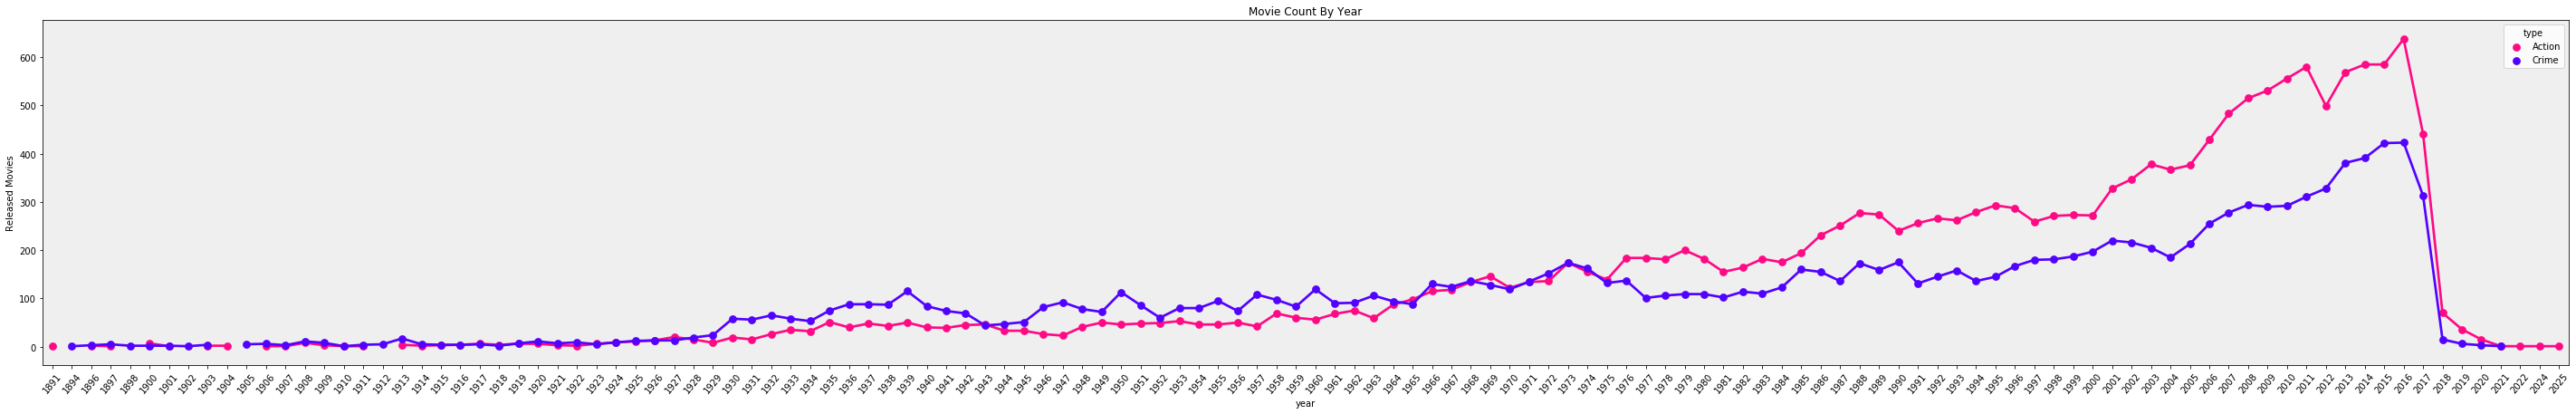

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax= plt.subplots()
ax.patch.set_facecolor('#EFEFEF')
plt.rcParams['figure.facecolor'] = 'black'
fig.set_size_inches(50, 7)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="center")
sns.pointplot(x=data3["year"], y=data3["id"],hue=data3["type"], data=data3,
                join=True, palette={"Crime": "#5202FF", "Action": "#FF0A85"},ax=ax) 
ax.set(xlabel='year', ylabel='Released Movies',title="Movie Count By Year")

In [52]:

data3.head()

,year,type,id
0,1891,Action,1
1,1894,Crime,1
2,1896,Action,2
3,1896,Crime,3
4,1897,Action,1


In [53]:
UniqueNames = data3.type.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data3[:][data3.type == key]
crime=0
romance=0
if DataFrameDict['Crime'].id.sum(axis = 0, skipna = True)> DataFrameDict['Action'].id.sum(axis = 0, skipna = True) :
    print('winner genre is crime based on released movies since 1894')
    crime=crime+1
else: 
    print('winner genre is romance based on released movies since 1894')
    Action=Action+1

winner genre is romance based on released movies since 1894


NameError: ignored

In [57]:
UniqueNames = data3.type.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data3[:][data3.type == key]
crime=0
romance=0
if DataFrameDict['Crime'].id.sum(axis = 0, skipna = True)> DataFrameDict['Action'].id.sum(axis = 0, skipna = True) :
    print('winner genre is crime based on released movies since 1894')
    crime=crime+1
else: 
    print('winner genre is Action based on released movies since 1894')
    romance=romance+1

winner genre is Action based on released movies since 1894


In [59]:
DataFrameDict['Action'].sum(axis = 0, skipna = True)

year                                               245217
type    ActionActionActionActionActionActionActionActi...
id                                                  17337
dtype: object

[Text(0, 0.5, 'Avearage revenue'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'Average revenue By year')]

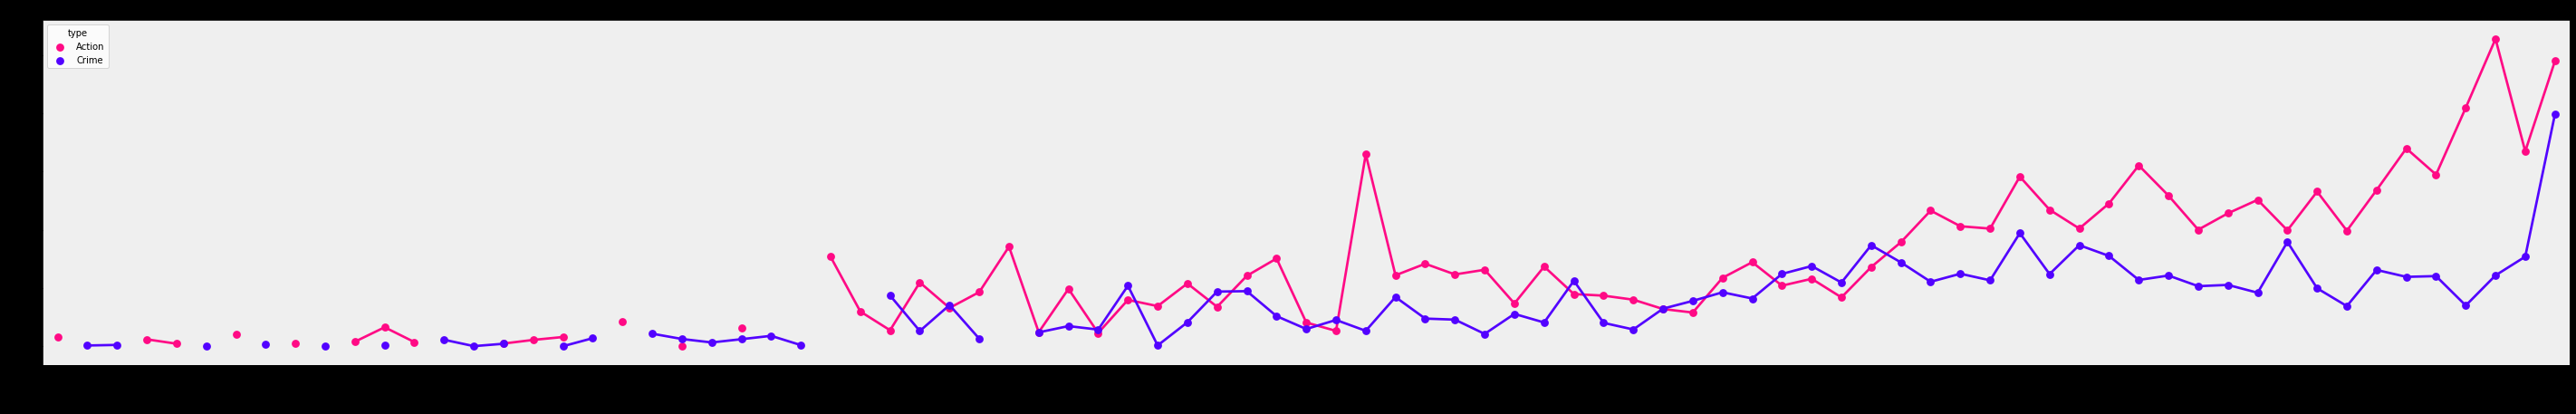

In [60]:
fig, ax1 = plt.subplots()
fig.set_size_inches(50, 7)
ax1.patch.set_facecolor('#EFEFEF')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="center")
sns.pointplot(x=data1["year"], y=data1["revenue"],hue=data1["type"], 
               palette={"Crime": "#5202FF", "Action": "#FF0A85"},data=data1,join=True,ax1=ax1)
ax1.set(xlabel='year', ylabel='Avearage revenue',title="Average revenue By year")

In [62]:
UniqueNames = data3.type.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data1[:][data1.type == key]

if DataFrameDict['Crime'].revenue.sum(axis = 0, skipna = True)> DataFrameDict['Action'].revenue.sum(axis = 0, skipna = True) :
    print('winner genre is crime based on avarage Revenue since 1894')
    crime = crime +1
else: 
    print('winner genre is Action based on avarage Revenue since 1894')
    romance= romance+1

winner genre is Action based on avarage Revenue since 1894


[Text(0, 0.5, 'Average budget'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'Average budget By year')]

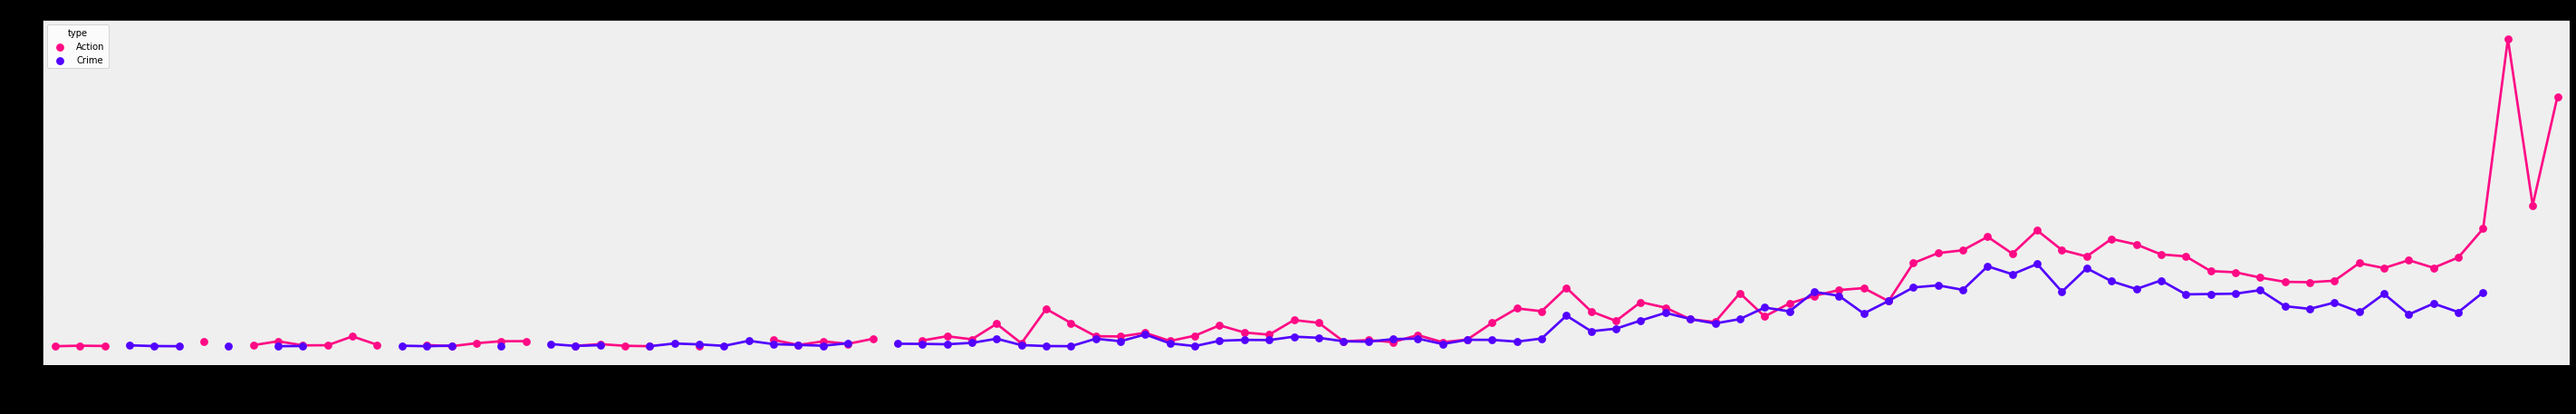

In [66]:
fig, ax2 = plt.subplots()
fig.set_size_inches(50, 7)
ax2.patch.set_facecolor('#EFEFEF')
ax2.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="center")
sns.pointplot(x=data2["year"], y=data2["budget"],hue=data2["type"],
               palette={"Crime": "#5202FF", "Action": "#FF0A85"},data=data2,join=True,ax2=ax2)
ax2.set(xlabel='year', ylabel='Average budget',title="Average budget By year")

In [68]:
UniqueNames = data3.type.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data2[:][data2.type == key]

if DataFrameDict['Crime'].budget.sum(axis = 0, skipna = True)> DataFrameDict['Action'].budget.sum(axis = 0, skipna = True) :
    print('winner genre is crime based on Avarage Budget since 1894')
    crime = crime +1
else: 
    print('winner genre is Action based on Average Budget since 1894')
    romance= romance+1

winner genre is Action based on Average Budget since 1894


[Text(0, 0.5, 'Avearage popularity'),
 Text(0.5, 0, 'year'),
 Text(0.5, 1.0, 'Average popularity By year')]

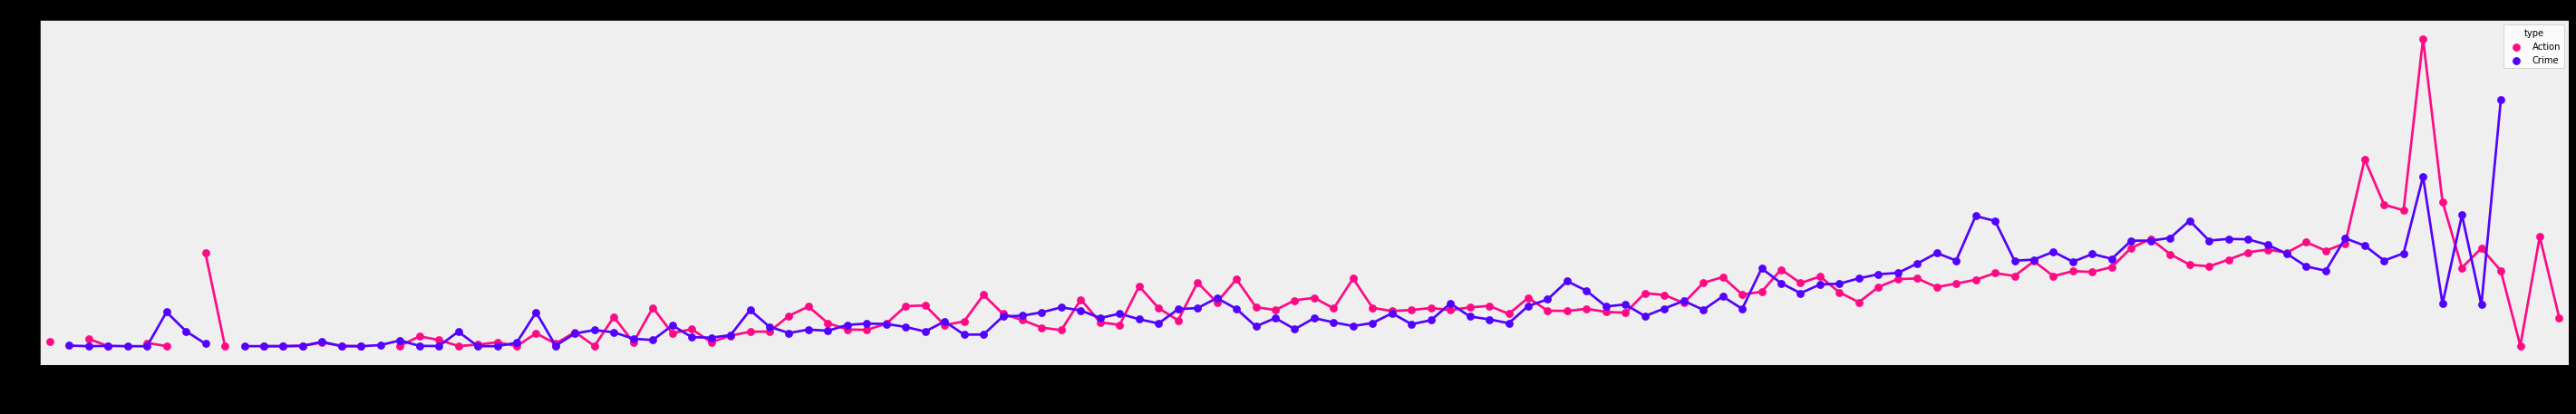

In [71]:
fig, ax0 = plt.subplots()
fig.set_size_inches(50, 7)
ax0.patch.set_facecolor('#EFEFEF')
ax0.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="center")
sns.pointplot(x=data["year"], y=data["popularity"],hue=data["type"],
               palette={"Crime": "#5202FF", "Action": "#FF0A85"}, data=data,join=True,ax0=ax0)
ax0.set(xlabel='year', ylabel='Avearage popularity',title="Average popularity By year")

In [72]:
UniqueNames = data3.type.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = data[:][data.type == key]

if DataFrameDict['Crime'].popularity.sum(axis = 0, skipna = True)> DataFrameDict['Action'].popularity.sum(axis = 0, skipna = True) :
    print('winner genre is crime based on Average Popularity since 1894')
    crime = crime +1
else: 
    print('winner genre is Romance based on Average Popularity since 1894')
    romance= romance+1

winner genre is Romance based on Average Popularity since 1894


In [78]:
if crime>romance:
  print("Winner is Crime genre")
else:
  print("Winner is Action genre")

Winner is Action genre
